In [12]:
# Librerías

import numpy as np
import matplotlib.pyplot as plt

## 2. Generación de Señales

C = 9, N = 48, dada la señal:

$
x(n) = \begin{Bmatrix}
18  & -24<n<0\\
0 & n = 0 \\
-18 & 0 < n < 24
\end{Bmatrix}
$

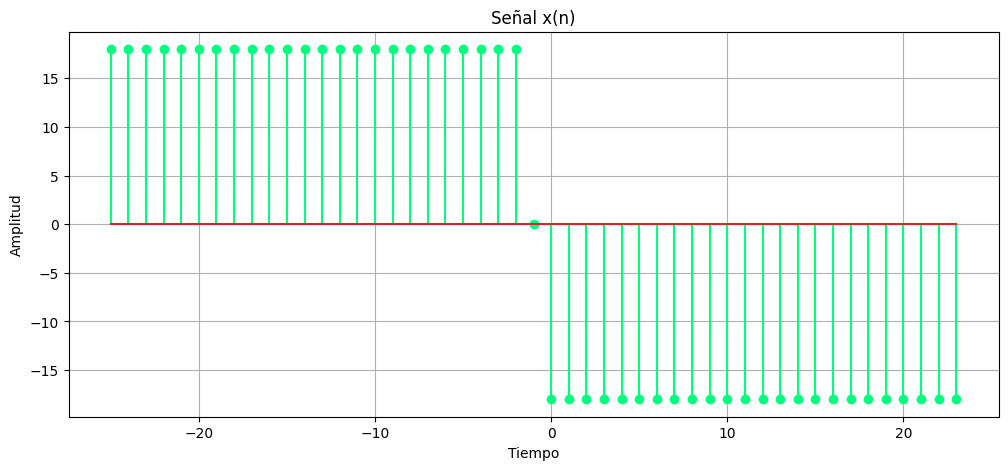

49


In [13]:
'''
1. Grafique la señal x(n) con su respectivo vector de tiempo n para una frecuencia de muestreo de 1Hz. ¿Qué
puede decir sobre la señal graficada?
'''

f = 1 # Frecuencia 1 Hz
C = 9 # Último dígito cédula
N =  30 + (2*C) # N = 48

am =2*C*np.ones(int(N/2)) # Genero un array con amplitud positiva 18
sig =  np.concatenate((am , [0] , -am)) # Concateno los tres arreglos
t =  np.arange((-N/2) - 1, (N/2) , f) # Vector de tiempo

# Gráfica
plt.figure(figsize=(12,5))
plt.title("Señal x(n)")
plt.stem(t ,sig, '#00FF7F')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()

print(len(sig))

2. Es la señal par o impar. ¿Por qué?


Una señal se considera par si es simétrica al eje Y.
Una señal se considera impar si es simétrica al eje X.

La señal $x(n)$ es impar, pues es simétrica en el eje X y no lo es en el eje Y.

La simetría podría pensarse como una igualdad de áreas según un punto de referencia, en este caso un eje.

## 3. Coeficientes de la serie de Fourier


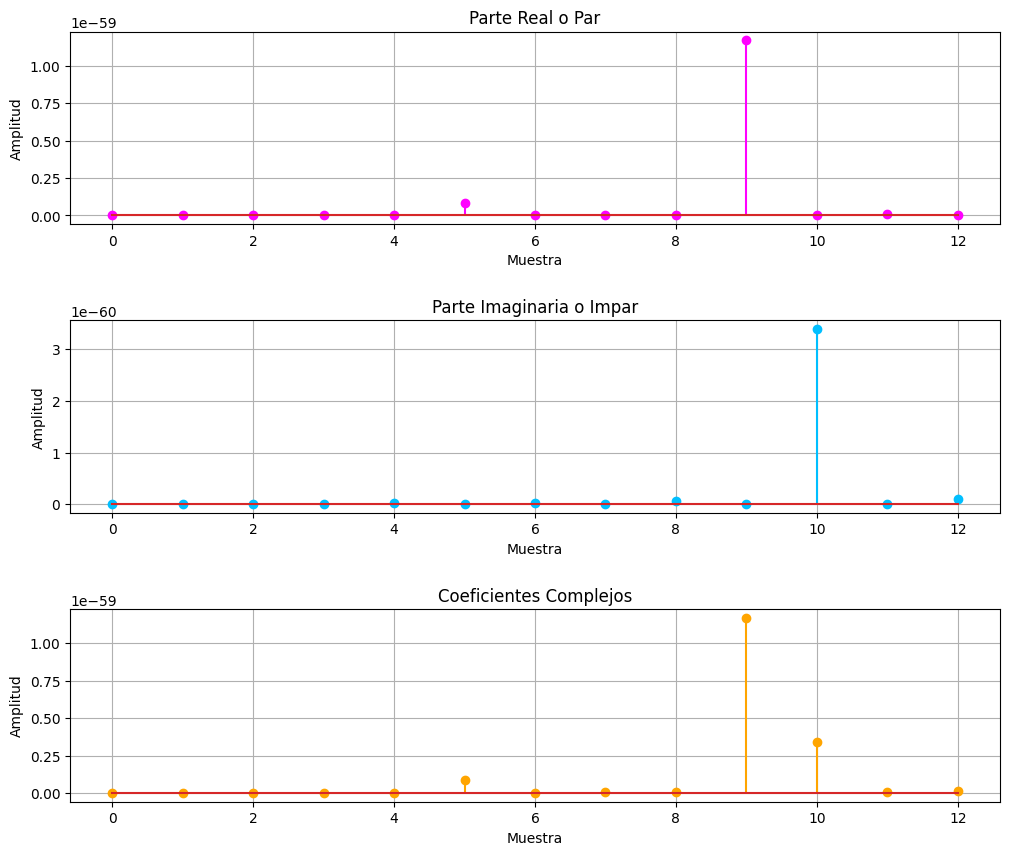

In [14]:
'''
1. Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.

Nota: La parte par es equivalente a la parte real de la ecuación de análisis (Ecuación 2) y la parte impar a
la parte imaginaria.

2. Grafique en un subplot el espectro de potencia para la parte par y la impar.
¿Qué puede concluir a partir de esto?
¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?
'''

k = 12
coef =  np.arange(0, k + 1, 1) # Genero un array de cero hasta k con pasos de 1

# Vectores vacíos
Ck = []
Ck_R = []
Ck_I = []

# Cálculo de coeficientes
for m in coef:
    Ck.append((1/N)*sum(sig*np.exp((-2j * np.pi * m * k)/N)))
    Ck_R.append(Ck[m].real)
    Ck_I.append(Ck[m].imag)


# Gráficas
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.title("Parte Real o Par")
plt.stem(coef,abs(np.array(Ck_R))**2, '#FF00FF')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.subplots_adjust(hspace = 0.5)

plt.subplot(3,1,2)
plt.stem(coef, abs(np.array(Ck_I))**2, '#00BFFF')
plt.title("Parte Imaginaria o Impar")
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.subplots_adjust(hspace = 0.5)

plt.subplot(3,1,3)
plt.stem(coef, abs(np.array(Ck))**2, '#FFA500')
plt.title("Coeficientes Complejos")
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.show()

En el dominio de Fourier, se representa una señal como una combinación de senos y cosenos (sinusoidal), la parte par corresponde al coseno y la parte impar corresponde a los senos.

Los coeficientes pares en Fourier son en su mayoría nulos por la imparidad de la señal.

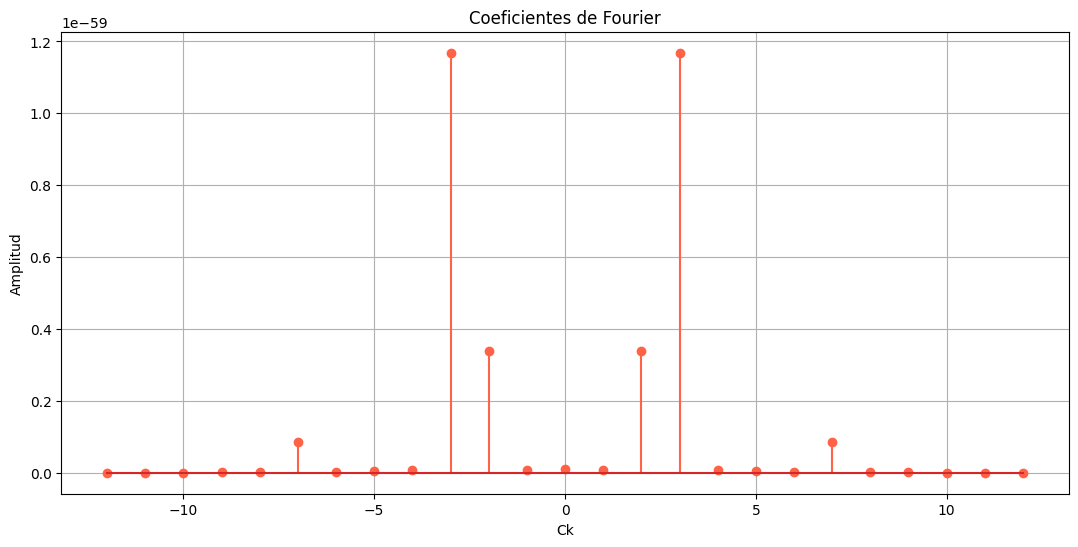

In [31]:
'''
3. Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafiquelos.

Nota: Recuerde que el espectro es simétrico, por lo tanto debe reflejar los coeficientes para construir la parte
negativa del espectro.
'''

time =  np.arange(-k, k + 1, 1)
Ck.reverse()
Cks =abs(np.array(Ck))**2
espectro = np.concatenate((Cks[-1: 0: -1],Cks))

# Gráfica
plt.figure(figsize=(13,6))
plt.stem(time,espectro, '#FF6347')
plt.title('Coeficientes de Fourier')
plt.ylabel("Amplitud")
plt.xlabel("Ck")
plt.grid()
plt.show()

La componente en cero es nula, esto se traduce en un nivel DC nulo para la señal.
El mayor aporte en potencia lo dan los coeficientes imaginarios o impares, esto por la imparidad de la señal.

In [16]:
# Potencia obtenida de los coeficientes
power_coef  =  2*np.sum(abs(np.array(Ck)**2))
print(f'Potencia obtenida a través de los coeficientes de la serie {power_coef}')


# Potencia obtenida directamente de la señal
power_sig =  np.sum(abs(sig)**2/N)
print(f'Potencia obtenida directamente de la señal {power_sig}')

Potencia obtenida a través de los coeficientes de la serie 3.2524438095897693e-59
Potencia obtenida directamente de la señal 324.0


## 4. Síntesis de señales

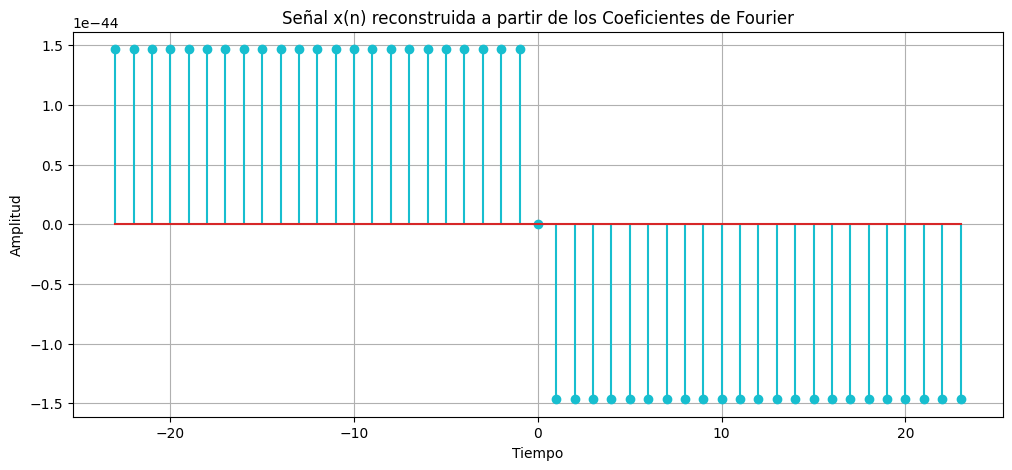

In [19]:
'''
1. Reconstruya la señal x(n) a partir de los coeficientes extraídos usando la ecuación de síntesis (Ecuación 1).
Grafique y concluya acerca de la señal obtenida.
'''
f = 1 # Frecuencia 1 Hz
C = 9 # Último dígito cédula
N =  30 + (2*C) # N = 48

k = 12

coef =  np.arange(0, k + 1, 1) # Genero un array de cero hasta k con pasos de 1
t =  np.arange((-N/2) + 1 , (N/2) , f) # Vector de tiempo

xn = np.zeros_like(t, dtype=complex)

# Para n >= 0
for a in coef:
    xn += Ck[a]*np.exp((2j * np.pi * k * a)/N)

# Mi vector xn tiene el doble de longitud que necesito, por lo que genero dos
# vectores con la mitad de su longitud, uno con amplitud positiva y otro con
# amplitud negativa
b = len(xn)//2
xn_neg = xn[-b:] # Vector para -N/2 < n < 0
xn_pos = xn[:b] # Vector para 0 < n < N/2
sig =  np.concatenate((-xn_neg , [0] , xn_pos)) # Concateno los tres arreglos



# Gráfica
plt.figure(figsize=(12,5))
plt.title("Señal x(n) reconstruida a partir de los Coeficientes de Fourier")
plt.stem(t ,sig, '#17becf')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()



Para la reconstrucción, tuvo que ser tenida en cuenta tanto la parte negativa como positiva en sus respectivas muestras de tiempo, pues al momento de reconstruirla sin tener lo anterior en cuenta se mostraba un vector de puntos de amplitud negativa.

La señal se reconstruyó bastante bien, aunque con una amplitud reducida.

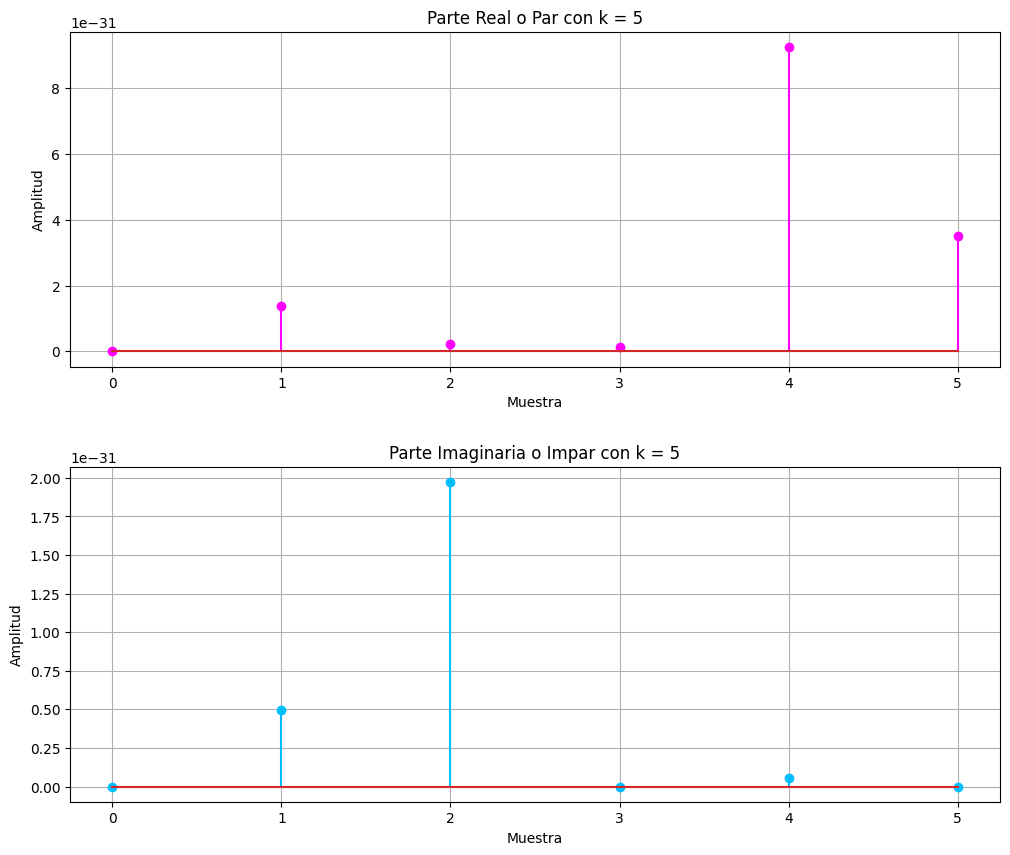

In [7]:
'''
2. Repita el procedimiento anterior para un k=5 y k=(N/2−1).

'''

# Para K = 5

k = 5
am =2*C*np.ones(int(N/2)) # Genero un array con amplitud positiva 18
sig =  np.concatenate((am , [0] , -am)) # Concateno los tres arreglos
coef =  np.arange(0, k + 1, 1) # Genero un array de cero hasta k con pasos de 1

# Vectores vacíos
Ck = []
Ck_R = []
Ck_I = []

# Cálculo de coeficientes
for m in coef:
    Ck.append((1/N)*sum(sig*np.exp((-2j * np.pi * m * k)/N)))
    Ck_R.append(Ck[m].real)
    Ck_I.append(Ck[m].imag)


# Gráficas
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Parte Real o Par con k = 5")
plt.stem(coef,abs(np.array(Ck_R))**2, '#FF00FF')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.subplots_adjust(hspace = 0.3)

plt.subplot(2,1,2)
plt.stem(coef, abs(np.array(Ck_I))**2, '#00BFFF')
plt.title("Parte Imaginaria o Impar con k = 5")
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.show()

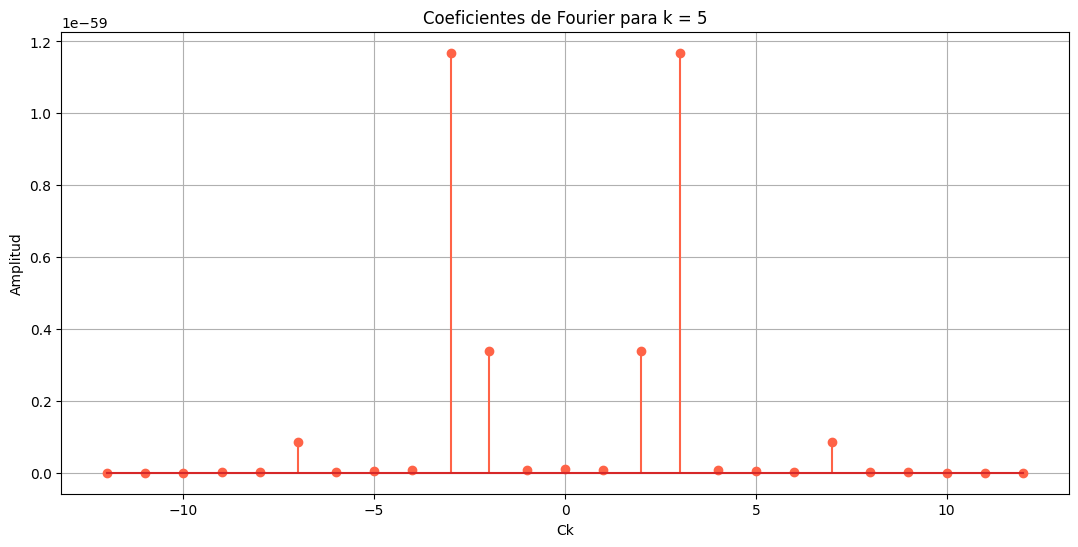

In [34]:
time =  np.arange(-k, k + 1, 1)

Ck.reverse()
Cks =abs(np.array(Ck))**2
espectro = np.concatenate((Cks[-1: 0: -1], Cks))

# Gráfica
plt.figure(figsize=(13,6))
plt.stem(time,espectro, '#FF6347')
plt.title('Coeficientes de Fourier para k = 5')
plt.ylabel("Amplitud")
plt.xlabel("Ck")
plt.grid()
plt.show()

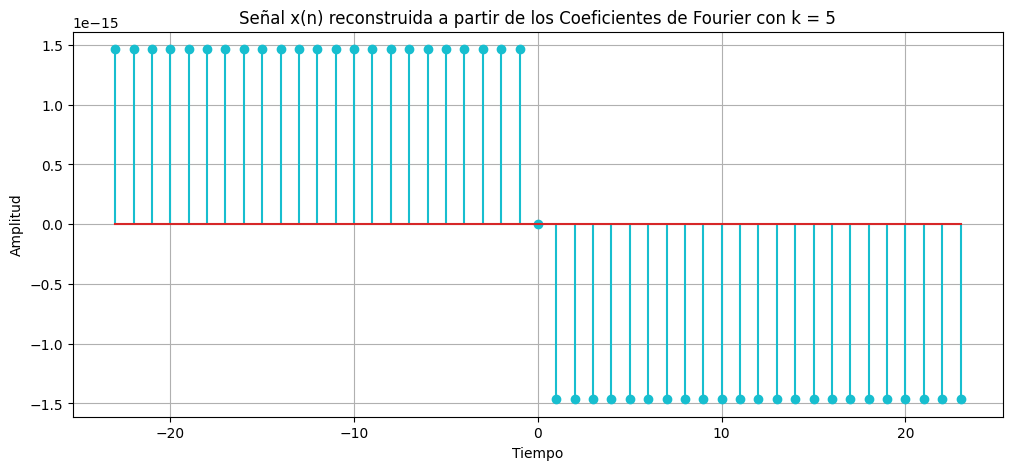

In [ ]:
f = 1 # Frecuencia 1 Hz
C = 9 # Último dígito cédula
N =  30 + (2*C) # N = 48

k = 5

coef =  np.arange(0, k + 1, 1) # Genero un array de cero hasta k con pasos de 1
t =  np.arange((-N/2) + 1 , (N/2) , f) # Vector de tiempo

xn = np.zeros_like(t, dtype=complex)

# Para n >= 0
for a in coef:
    xn += Ck[a]*np.exp((2j * np.pi * k * a)/N)

# Mi vector xn tiene el doble de longitud que necesito, por lo que genero dos
# vectores con la mitad de su longitud, uno con amplitud positiva y otro con
# amplitud negativa
b = len(xn)//2
xn_neg = xn[-b:] # Vector para -N/2 < n < 0
xn_pos = xn[:b] # Vector para 0 < n < N/2
sig =  np.concatenate((-xn_neg , [0] , xn_pos)) # Concateno los tres arreglos



# Gráfica
plt.figure(figsize=(12,5))
plt.title("Señal x(n) reconstruida a partir de los Coeficientes de Fourier con k = 5")
plt.stem(t ,sig, '#17becf')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()

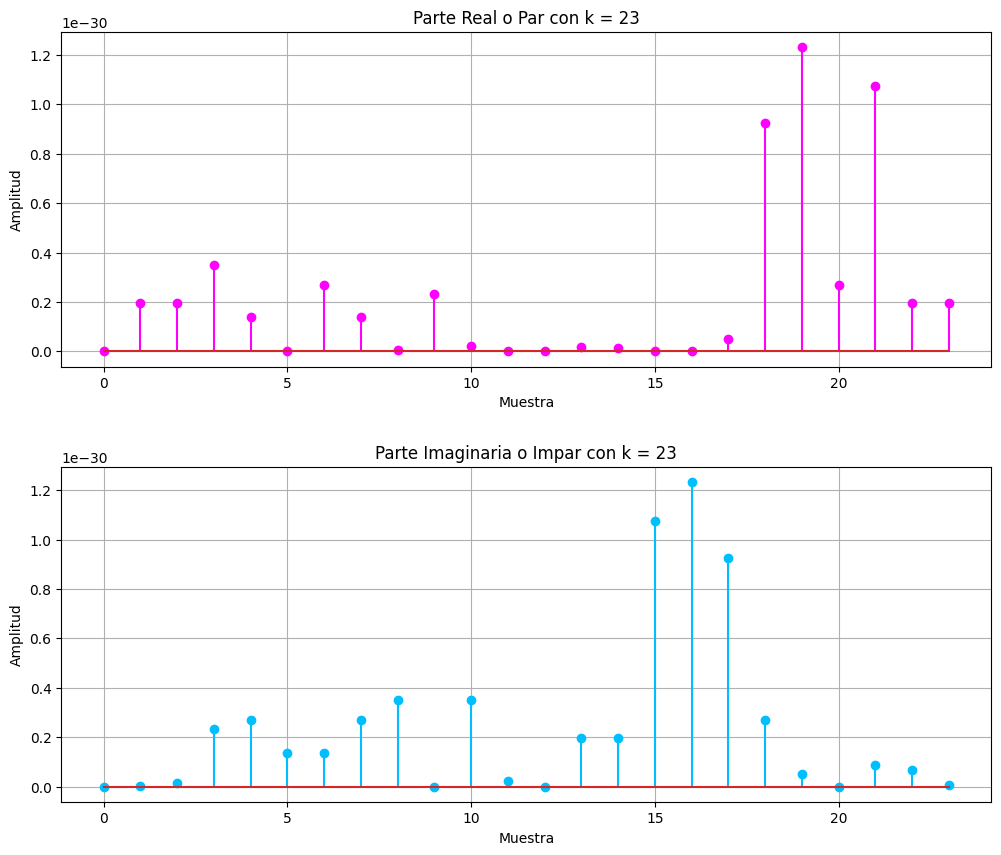

In [42]:
# Para k = 23

k = 23
am =2*C*np.ones(int(N/2)) # Genero un array con amplitud positiva 18
sig =  np.concatenate((am , [0] , -am)) # Concateno los tres arreglos
coef =  np.arange(0, k + 1, 1) # Genero un array de cero hasta k con pasos de 1

# Vectores vacíos
Ck = []
Ck_R = []
Ck_I = []

# Cálculo de coeficientes
for m in coef:
    Ck.append((1/N)*sum(sig*np.exp((-2j * np.pi * m * k)/N)))
    Ck_R.append(Ck[m].real)
    Ck_I.append(Ck[m].imag)


# Gráficas
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Parte Real o Par con k = 23")
plt.stem(coef,abs(np.array(Ck_R))**2, '#FF00FF')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.subplots_adjust(hspace = 0.3)

plt.subplot(2,1,2)
plt.stem(coef, abs(np.array(Ck_I))**2, '#00BFFF')
plt.title("Parte Imaginaria o Impar con k = 23")
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()

plt.show()

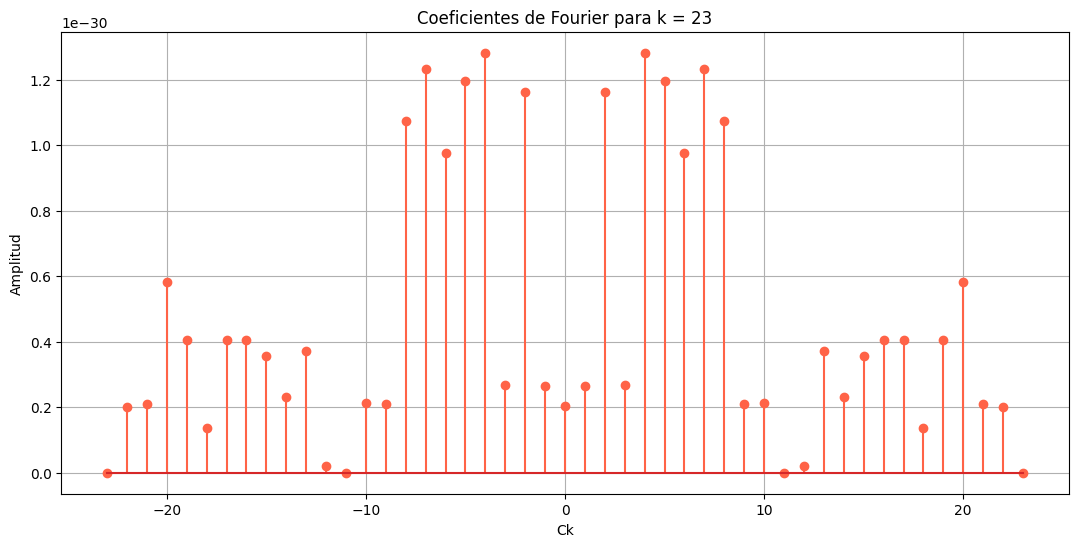

In [44]:
time =  np.arange(-k, k + 1, 1)
Ck.reverse()
Cks =abs(np.array(Ck))**2
espectro = np.concatenate((Cks[-1: 0: -1], Cks))

# Gráfica
plt.figure(figsize=(13,6))
plt.stem(time,espectro, '#FF6347')
plt.title('Coeficientes de Fourier para k = 23')
plt.ylabel("Amplitud")
plt.xlabel("Ck")
plt.grid()
plt.show()

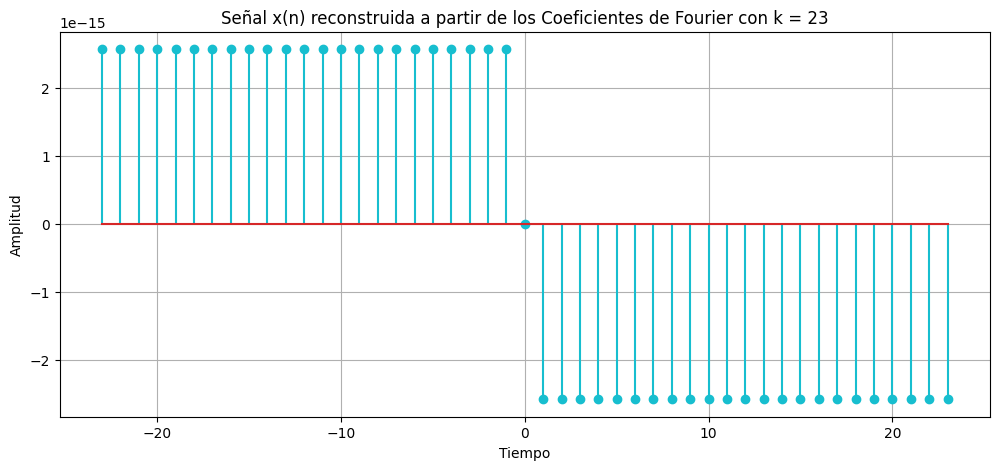

In [ ]:
f = 1 # Frecuencia 1 Hz
C = 9 # Último dígito cédula
N =  30 + (2*C) # N = 48
k = 23

coef =  np.arange(0, k + 1, 1) # Genero un array de cero hasta k con pasos de 1
t =  np.arange((-N/2) + 1 , (N/2) , f) # Vector de tiempo

xn = np.zeros_like(t, dtype=complex)

# Para n >= 0
for a in coef:
    xn += Ck[a]*np.exp((2j * np.pi * k * a)/N)

# Mi vector xn tiene el doble de longitud que necesito, por lo que genero dos
# vectores con la mitad de su longitud, uno con amplitud positiva y otro con
# amplitud negativa
b = len(xn)//2
xn_neg = xn[-b:] # Vector para -N/2 < n < 0
xn_pos = xn[:b] # Vector para 0 < n < N/2
sig =  np.concatenate((-xn_neg , [0] , xn_pos)) # Concateno los tres arreglos



# Gráfica
plt.figure(figsize=(12,5))
plt.title("Señal x(n) reconstruida a partir de los Coeficientes de Fourier con k = 23")
plt.stem(t ,sig, '#17becf')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()

¿Qué se puede observar al reducir y al incrementar el número de coeficientes?

En todos los casos aunque pudo reconstruirse correctamente la señal, es de esperarse que a mayor número de coeficientes haya mayor fidelidad de la señal reconstruida, pues se invierte mayor ancho de banda pero la señal resultante es más semejante a la original.

3. ¿Fue posible recuperar la señal en su totalidad?
¿Cuántos coeficientes considera necesarios para recuperar la señal en su totalidad?

En los tres casos de k (12, 5, 23) la señal se reconstruyó perfectamente, pues un tren de pulsos o muestras no resulta tan complejo al no ser continuo sino discreto, pero a mayor k, mayor número de coeficientes y por lo tanto, mayor reconstrucción de la señal.

## 5. Conclusiones

- Reconstruir al 100% una señal a partir de Fourier es imposible, ya que esto requeriría coeficientes infinitos y por ende, infinita potencia. Por lo que seleccionar un número de coeficientes que permita tener una señal semejante y a la vez un gasto en potencia adecuado es fundamental.

- Para señales pares se tiene una nulidad en sus coeficientes impares y para las señales impares se tendrá también una nulidad en los coeficientes pares.

- La serie de Fourier permite descomponer una señal en una suma de componentes sinusoidales (armónicos) con diferentes frecuencias, amplitudes y fases. Esta descomposición facilita el análisis de la señal en frecuencia y permite reconstruir la señal original a partir de sus coeficientes de Fourier.